In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from GimmePandas import ReadToPandas

In [150]:
#Make a list of working files and using only them (applied before modifying the problem files)
correct_files = []
for i in range (1,56):
    if i<10:
        a = "../Data/TenExSpectra_JSON/00"+str(i)+".json"
    elif i==18 or i==40 or i==43:
        continue
    else:
        a = "../Data/TenExSpectra_JSON/0"+str(i)+".json"
    correct_files.append(a)
print(correct_files)
print(len(correct_files))

['../Data/TenExSpectra_JSON/001.json', '../Data/TenExSpectra_JSON/002.json', '../Data/TenExSpectra_JSON/003.json', '../Data/TenExSpectra_JSON/004.json', '../Data/TenExSpectra_JSON/005.json', '../Data/TenExSpectra_JSON/006.json', '../Data/TenExSpectra_JSON/007.json', '../Data/TenExSpectra_JSON/008.json', '../Data/TenExSpectra_JSON/009.json', '../Data/TenExSpectra_JSON/010.json', '../Data/TenExSpectra_JSON/011.json', '../Data/TenExSpectra_JSON/012.json', '../Data/TenExSpectra_JSON/013.json', '../Data/TenExSpectra_JSON/014.json', '../Data/TenExSpectra_JSON/015.json', '../Data/TenExSpectra_JSON/016.json', '../Data/TenExSpectra_JSON/017.json', '../Data/TenExSpectra_JSON/019.json', '../Data/TenExSpectra_JSON/020.json', '../Data/TenExSpectra_JSON/021.json', '../Data/TenExSpectra_JSON/022.json', '../Data/TenExSpectra_JSON/023.json', '../Data/TenExSpectra_JSON/024.json', '../Data/TenExSpectra_JSON/025.json', '../Data/TenExSpectra_JSON/026.json', '../Data/TenExSpectra_JSON/027.json', '../Data/Te

In [151]:
data = ReadToPandas(correct_files)

origdata = data
df = data.sample(frac=1).reset_index(drop=True) #Randomize data order so that train and test sets don't have biases

Dataframe loaded


In [152]:
x_sufl = df["Reflectivity"] #Take only input values from the dictionary
y_sufl = df["Baseline"]

In [153]:
x_sufl_arr = pd.DataFrame(x_sufl.to_list()) #Separate values from one list to separate individuals

In [154]:
x_sufl_train = x_sufl_arr.head(419) #Divide data into train and test set
x_sufl_test = x_sufl_arr.tail(104)
y_sufl_train = y_sufl.head(419)
y_sufl_test = y_sufl.tail(104)


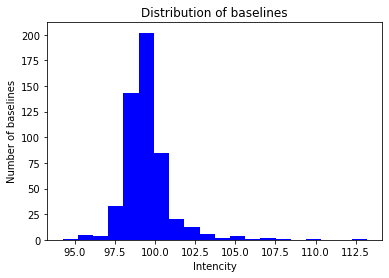

Mean value of baselines in dataset: 99.51


In [155]:
#Visualize data with histograms (whole data and then train and test to see that they represent well)
plt.hist(y_sufl, bins=20, density=False, facecolor='blue')
plt.xlabel("Intencity")
plt.ylabel("Number of baselines")
plt.title("Distribution of baselines")
plt.show()

## mean value of distribution
print("Mean value of baselines in dataset: %0.2f" %np.mean(y_sufl))

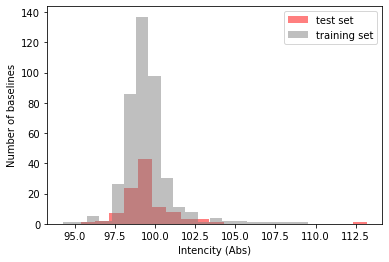

Mean value of baselines in training set: 99.49
Mean value of baselines in test set: 99.59


In [156]:
plt.hist(y_sufl_test, bins=20, density=False, alpha=0.5, facecolor='red', label='test set')
plt.hist(y_sufl_train, bins=20, density=False, alpha=0.5, facecolor='gray', label='training set')
plt.xlabel("Intencity (Abs)")
plt.ylabel("Number of baselines")
plt.legend()
plt.show()

## mean value of distributions
print("Mean value of baselines in training set: %0.2f" %np.mean(y_sufl_train))
print("Mean value of baselines in test set: %0.2f" %np.mean(y_sufl_test))

In [9]:
#Try with different kernel: Matern 3/2
from sklearn.gaussian_process.kernels import Matern



In [157]:
kernel = C(10, (1e-3, 1e3)) * Matern(1000, (1e-5, 1e5), 1.5)
gp_matern = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=2, alpha=10e-1)

In [158]:
# Notes from hyperparameter optimization:
#kernel = C(1.0, (1e-3, 1e3)) * Matern(1.0, (1e-5, 1e5), 1.5) --> 31.6**2 * Matern(length_scale=634, nu=1.5) --> MAE=0.67208
#kernel = C(10, (1e-3, 1e3)) * Matern(100, (1e-5, 1e5), 1.5) --> 31.3**2 * Matern(length_scale=630, nu=1.5) --> MAE=0.67154
#kernel = C(10, (1e-3, 1e3)) * Matern(1000, (1e-5, 1e5), 1.5) --> 31.3**2 * Matern(length_scale=630, nu=1.5) --> MAE=0.67154
#kernel = C(10, (1e-3, 1e3)) * Matern(1000, (1e-5, 1e5), 1.5), alpha=10e-4 --> 27.8**2 * Matern(length_scale=436, nu=1.5) --> MAE=0.73626
#kernel = C(10, (1e-3, 1e3)) * Matern(1000, (1e-5, 1e5), 1.5), alpha=10e-3 --> 27.9**2 * Matern(length_scale=440, nu=1.5) --> MAE=0.73488
#kernel = C(10, (1e-3, 1e3)) * Matern(100, (1e-5, 1e5), 1.5), alpha=10e-3 --> 27.9**2 * Matern(length_scale=440, nu=1.5) --> MAE=0.73488
#kernel = C(10, (1e-3, 1e3)) * Matern(100, (1e-5, 1e5), 1.5), alpha=10e-2 --> 28.7**2 * Matern(length_scale=486, nu=1.5) --> MAE=0.71806
#kernel = C(10, (1e-3, 1e3)) * Matern(100, (1e-5, 1e5), 1.5), alpha=10e-1 --> 31.6**2 * Matern(length_scale=1.74e+03, nu=1.5) --> MAE=0.46393
#kernel = C(10, (1e-3, 1e3)) * Matern(100, (1e-5, 1e5), 1.5), alpha=10e0 --> 31.6**2 * Matern(length_scale=4.32e+03, nu=1.5) --> MAE=0.48743

In [159]:
gp_matern.fit(x_sufl_train, y_sufl_train)

GaussianProcessRegressor(alpha=1.0,
                         kernel=3.16**2 * Matern(length_scale=1e+03, nu=1.5),
                         n_restarts_optimizer=2)

In [160]:
print(gp_matern) #
gp_matern.get_params
gp_matern.kernel_ #This shows, what are the used optimal hyperparameter values

GaussianProcessRegressor(alpha=1.0,
                         kernel=3.16**2 * Matern(length_scale=1e+03, nu=1.5),
                         n_restarts_optimizer=2)


31.6**2 * Matern(length_scale=1.69e+03, nu=1.5)

In [161]:
y_pred, sigma = gp_matern.predict(x_sufl_test, return_std=True)
#print(sigma)

#print(y_pred)
#print(np.concatenate([y_pred - 1.9600 * sigma, (y_pred + 1.9600 * sigma)[::-1]]))

In [162]:
#Mean absolute error:
print("MAE:")
print(np.abs(y_pred-y_sufl_test).mean())

MAE:
0.6555960508446528


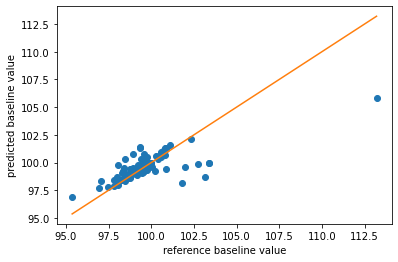

0.6499868245981133


In [163]:
#Plotting the results of the prediction
plt.plot(y_sufl_test, y_pred, 'o')
plt.plot([np.min(y_sufl_test),np.max(y_sufl_test)], [np.min(y_sufl_test),np.max(y_sufl_test)], '-')
plt.xlabel('reference baseline value')
plt.ylabel('predicted baseline value')
plt.show()
R_score = gp_matern.score(x_sufl_train, y_sufl_train)
print(R_score)

In [164]:
# Notes from suffling the data sets (cross-validation):
#MAE=0.464, R2=0.667
#suffle data:
#MAE=0.462, R2=0.700
#MAE=0.493, R2=0.668
#MAE=0.545, R2=0.688
#MAE=0.561, R2=0.689